# ARIMA MODEL
In 1970, Box and Jenkins introduced the ARIMA (AutoRegressive Integrated Moving Average) model, which has since become a cornerstone for time series forecasting, particularly in economics and finance. ARIMA models are widely recognized for their robustness and efficiency in short-term predictions, consistently outperforming more complex structural models in many cases.

The strength of ARIMA lies in its ability to generate accurate short-term forecasts by using a linear combination of past values and past errors. The model is expressed mathematically as:

$$
Y_t = \phi + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \dots - \theta_q \epsilon_{t-q}
$$

Where:
- $Y_t$ represents the actual value of the variable at time \( t \),
- $\epsilon_t$ is the random error (or noise) at time \( t \),
- $\phi_i$ are the coefficients for the autoregressive (AR) terms, capturing the influence of past values,
- $\theta_j$ are the coefficients for the moving average (MA) terms, representing the impact of past forecast errors,
- $p$ refers to the number of past observations (lags) used in the autoregressive terms, and
- $q$ denotes the number of past errors used in the moving average component.


This formulation allows ARIMA to effectively model time series data by accounting for both trends in the data and the influence of past deviations from predicted values. It has been widely used in forecasting financial market trends, economic indicators, and other types of time-dependent data (Ayodele A. Adebiyi, Aderemi O. Adewumi, Charles K. Ayo, 2014)

In this project, we will implement the ARIMA model using the `statsmodels` library. Specifically, the ARIMA model is provided by the `tsa` sub-module through `statsmodels.tsa.arima_model.ARIMA`.
Additionally, we will utilize the `sktime` library for automatic ARIMA modeling using the `AutoARIMA` class from `sktime.forecasting.arima`.

### Steps to Compute the ARIMA Model

1. Load the time series from csv
2. Data Analysis and Plotting Graphs
3. Defferenciation
4. Autoregressive model
5. Autoarima
6. Fit Arima model
7. Use the Arima model to forecast the next day
8. Autoarima - using Sktime

### Useful libraries

In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade pandas

ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\Melectronics\\anaconda3\\Lib\\site-packages\\pandas.libs\\msvcp140-ef6047a69b174ada5cb2eff1d2bc9a62.dll'
Consider using the `--user` option or check the permissions.




  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Rolling back uninstall of pandas
  Moving to c:\users\melectronics\anaconda3\lib\site-packages\pandas-2.1.4.dist-info\
   from C:\Users\Melectronics\anaconda3\Lib\site-packages\~andas-2.1.4.dist-info
  Moving to c:\users\melectronics\anaconda3\lib\site-packages\pandas\__init__.py
   from C:\Users\Melectronics\AppData\Local\Temp\pip-uninstall-_vk5wyg7\__init__.py
  Moving to c:\users\melectronics\anaconda3\lib\site-packages\pandas\__pycache__\
   from C:\Users\Melectronics\anaconda3\Lib\site-packages\pandas\~_pycache__
  Moving to c:\users\melectronics\anaconda3\lib\site-packages\pandas\_config\
   from C:\Users\Melectronics\anaconda3\Lib\site-packages\pandas\~config
  Moving to c:\users\melectronics\ana

In [61]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 991.0 kB/s eta 0:00:01
   -------------------- ------------------- 317.4/614.7 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------ --------------------------- 0.9/2.8 MB 27.4 MB/s eta 0:00:01
   ---------------------------- ----------- 2.0/2.8 MB 24.9 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 25.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 22.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [23]:
pip install sktime

   ---------------------------------------- 0.0/34.4 MB ? eta -:--:--
   ---------------------------------------- 0.2/34.4 MB 4.6 MB/s eta 0:00:08
    --------------------------------------- 0.8/34.4 MB 10.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.9/34.4 MB 13.4 MB/s eta 0:00:03
   --- ------------------------------------ 3.0/34.4 MB 16.0 MB/s eta 0:00:02
   ---- ----------------------------------- 4.2/34.4 MB 17.9 MB/s eta 0:00:02
   ----- ---------------------------------- 5.0/34.4 MB 18.9 MB/s eta 0:00:02
   ------ --------------------------------- 6.0/34.4 MB 18.3 MB/s eta 0:00:02
   -------- ------------------------------- 7.0/34.4 MB 19.6 MB/s eta 0:00:02
   --------- ------------------------------ 8.2/34.4 MB 19.4 MB/s eta 0:00:02
   ---------- ----------------------------- 9.0/34.4 MB 19.1 MB/s eta 0:00:02
   ---------- ----------------------------- 9.4/34.4 MB 19.3 MB/s eta 0:00:02
   ------------- -------------------------- 11.3/34.4 MB 21.8 MB/s eta 0:

In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from pmdarima.arima import auto_arima 

c:\Users\Melectronics\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 1. Load the time series from csv
The stock data used in this research consists of historical DAILY prices of some stocks. For the purpose of this study, the closing price has been selected as the primary variable for forecasting, as it best captures the overall activity of the index throughout each trading day.

In [3]:
df = pd.read_csv('data.csv', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
#df = df.tail(2000) #select last 200 rows of the data
df.head()


,Date,MSFT,MCD,WFC,XOM,GOOG,AAL,JPM,GE,AMZN,IBM
0,2015-01-02,46.760,93.26,54.70,92.83,524.81,53.910,62.49,25.06,308.52,162.06
1,2015-01-05,46.325,92.23,53.20,90.29,513.87,53.875,60.55,24.60,302.19,159.51
2,2015-01-06,45.650,92.40,52.09,89.81,501.96,53.040,58.98,24.07,295.29,156.07
3,2015-01-07,46.230,94.01,52.40,90.72,501.10,53.010,59.07,24.08,298.42,155.05
4,2015-01-08,47.590,94.36,53.56,92.23,502.68,53.660,60.39,24.37,300.46,158.42


In [4]:
# closing price
closing_price = df[['Date', 'MSFT']].copy()
closing_price.head(7)

,Date,MSFT
0,2015-01-02,46.760
1,2015-01-05,46.325
2,2015-01-06,45.650
3,2015-01-07,46.230
4,2015-01-08,47.590
5,2015-01-09,47.190
6,2015-01-12,46.600


In [4]:
#check data - count the number of missing values
c_nana = closing_price.isna().sum()
print(f'Number of NaN values: {c_nana}') #f-string to embed variables in a string

Number of NaN values: Date    0
MSFT    0
dtype: int64


### 2. Data Analysis and Plotting Graphs

In this section, we will apply various visualization techniques and perform statistical tests to gain deeper insights into the time series data.

In [6]:
# Basic statistics analysis
statistics = closing_price.describe()
print(statistics)

              MSFT
count  1511.000000
mean     99.812462
std      51.881934
min      40.290000
25%      55.740000
50%      86.350000
75%     135.350000
max     231.650000


In [6]:
# Check for stationarity: Augmented Dickey-Fuller test.
# If the series is non-stationary we have to make it stationary!
test_result = adfuller(closing_price['MSFT'].dropna()) #dropna() to remove Nan values 

# H0: data is not stationary
# H1: data is stationary

def adfuller_test(series):
    result = adfuller(series.dropna())
    labels = [ 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("P value is less than 0.05. Reject the null hypothesis H0. Data is stationary")
    else:
        print("P value is greater than 0.05. Accept the null hypothesis H0. Data is not stationary")

adfuller_test(closing_price['MSFT'])

ADF Test Statistic : 1.735415969654154
p-value : 0.9982119425772058
#Lags Used : 24
Number of Observations Used : 1486
P value is greater than 0.05. Accept the null hypothesis H0. Data is not stationary


Text(0, 0.5, 'Frequency')

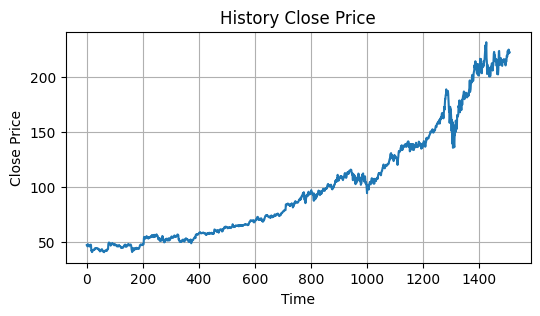

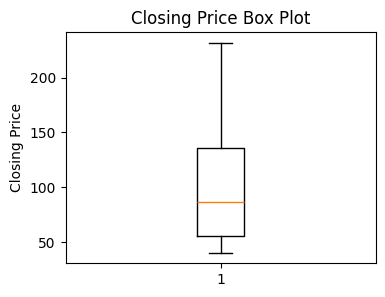

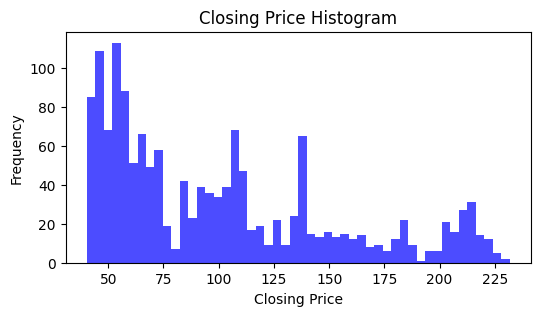

In [7]:
# History closing price
plt.figure(figsize=(6,3))
plt.plot(closing_price['MSFT'], label='Close Price')
plt.title('History Close Price')
plt.ylabel('Close Price')
plt.xlabel('Time')
plt.grid(True)

#Box-plot
plt.figure(figsize=(4, 3))
plt.boxplot(closing_price['MSFT'])
plt.title('Closing Price Box Plot')
plt.ylabel('Closing Price')

# Closig price histogram
plt.figure(figsize=(6, 3))
plt.hist(closing_price['MSFT'], bins=50, color='blue', alpha=0.7)
plt.title('Closing Price Histogram')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')



Trends - to do

Seasonality  - to do

Fluctuations  - to do

Periodicity - to do

### 3. Defferenciation
In this part of the code, we will difference the closing price data to make it stationary. 
Previously we have checked for the stationarity of the prices and the result was that prices was NON - STATIONARY.
We will difference the data by subtracting the previous day's closing price from the current day's closing price. We will then plot the differenced data and check if it is stationary using the ADF test.
We will do this process until we will reach the stationarity.

In [8]:
closing_price['Price First Difference'] = closing_price['MSFT'] - closing_price['MSFT'].shift(1)
closing_price #to shift the data by 1, since first data is NaN


,Date,MSFT,Price First Difference
0,2015-01-02,46.760,NaN
1,2015-01-05,46.325,-0.435
2,2015-01-06,45.650,-0.675
3,2015-01-07,46.230,0.580
4,2015-01-08,47.590,1.360
...,...,...,...
1506,2020-12-24,222.750,1.730
1507,2020-12-28,224.960,2.210
1508,2020-12-29,224.150,-0.810
1509,2020-12-30,221.680,-2.470


In [9]:
#test again the stationary of the data after 1st difference
adfuller_test(closing_price['Price First Difference'].dropna())

ADF Test Statistic : -9.74874117614663
p-value : 8.1224950283927e-17
#Lags Used : 24
Number of Observations Used : 1485
P value is less than 0.05. Reject the null hypothesis H0. Data is stationary


<Axes: >

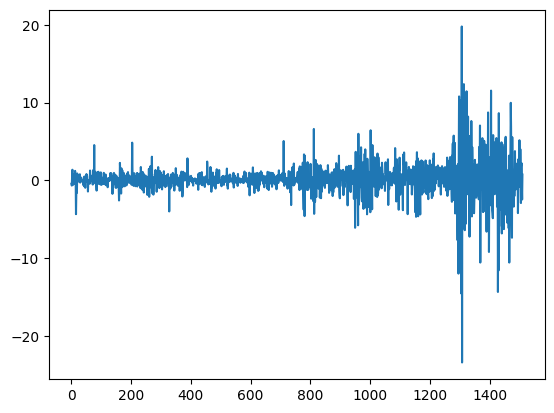

In [10]:
closing_price['Price First Difference'].plot()

### 4. Autoregressive model
In this part we will compute:
- AUTO CORRELATION FUNCTION (ACF): ACF measures the total correlation between a time series and its lagged values, including indirect effects. It helps identify the MA (q) terms in ARIMA models. A sharp cutoff suggests an MA process, while slow decay indicates non-stationarity.
- PARTIAL AUTO CORRELATION FUNCTION (PACF):PACF measures the direct correlation between a time series and its lagged values, removing the influence of intermediate lags. It helps identify the AR (p) terms in ARIMA models. A sharp cutoff suggests an AR process, and gradual decay indicates non-stationarity.

*In this part we will find p and q.*

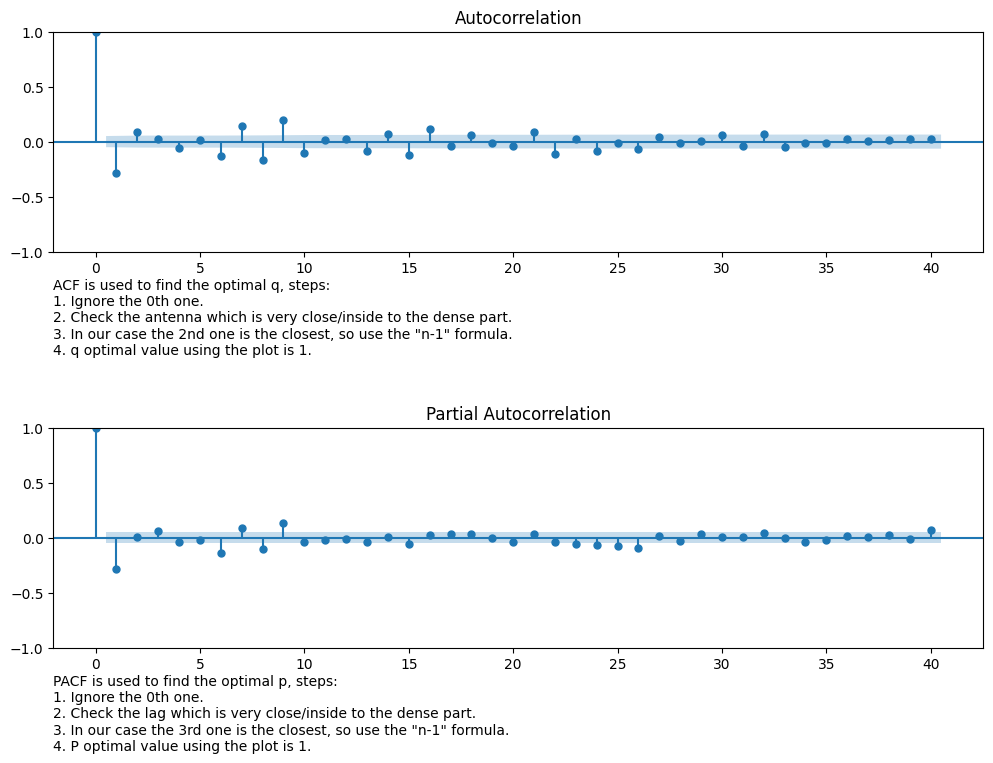

In [11]:
#Plot ACF and PACF function
fig = plt.figure(figsize=(12,8)) #create a figure

#ACF graphs
ax1 = fig.add_subplot(211) #add a subplot to the figure
fig = sm.graphics.tsa.plot_acf(closing_price['Price First Difference'].iloc[13:],lags=40,ax=ax1) #code for acf
acf_text = (
    'ACF is used to find the optimal q, steps: \n'
    '1. Ignore the 0th one.\n'
    '2. Check the antenna which is very close/inside to the dense part.\n'
    '3. In our case the 2nd one is the closest, so use the "n-1" formula. \n'
    '4. q optimal value using the plot is 1.'
)
ax1.text(0,-0.3, acf_text, ha='left', va='center', transform=ax1.transAxes) # Add text below the ACF plot

#PACF graphs
ax2 = fig.add_subplot(212) #add a secondo subplot to the figure
fig = sm.graphics.tsa.plot_pacf(closing_price['Price First Difference'].iloc[13:],lags=40,ax=ax2) #code for pacf
pacf_text = (
    'PACF is used to find the optimal p, steps: \n'
    '1. Ignore the 0th one.\n'
    '2. Check the lag which is very close/inside to the dense part.\n'
    '3. In our case the 3rd one is the closest, so use the "n-1" formula. \n'
    '4. P optimal value using the plot is 1.'
)
ax2.text(0,-0.3, pacf_text, ha='left', va='center', transform=ax2.transAxes) # Add text below the PACF plot

# Increase the distance between subplots
plt.subplots_adjust(hspace=0.8)  

plt.show()



*Now to find the optimal **D** value, use the following steps:*
1. If the **p-value** is less than 0.05 or if ADF < Critical [5%], then the time series is **stationary**, so there is no need to apply differencing, and the D value will be 0.
2. If the **p-value** is greater than 0.05, the time series is **non-stationary**. You need to difference the data and recheck the ADF test to determine stationarity.

So the optimal D value is how many times we differentiate your time series data to make it stationary. 

above we have calculated that the d value is 1.

(try to do a quickly code that gives as output only "how many time you need to transform the data stationary")


In [43]:
#.......

### 5. Autoarima
Now we compute again p,d and q but using a faster way, through the *AUTOARIMA*:

In [12]:
# USE AUTOARIMA to find p,d,q
model= auto_arima(closing_price['MSFT'], start_p=0, start_q=0,
                  test='adf',       # use adftest to find optimal 'd'
                  max_p=5, max_q=5, # maximum p and q
                  m=1,              # frequency of series
                  d=None,           # let model determine 'd'
                  seasonal=False,   # No Seasonality
                  start_P=0,
                  D=None,
                  trace=True,
                  error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6734.230, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6611.862, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6624.182, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6736.272, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6613.784, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6613.807, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6615.340, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6617.036, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.125 seconds


### 6. Fit Arima model

In [7]:
model = ARIMA(closing_price['MSFT'].dropna(), order=(1, 1, 0)) # Define the ARIMA model
model_fit = model.fit() # Fit the ARIMA model

print(model_fit.summary()) # Print the summary of the model

                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 1511
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3306.518
Date:                Mon, 16 Sep 2024   AIC                           6617.036
Time:                        20:21:43   BIC                           6627.675
Sample:                             0   HQIC                          6620.998
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2777      0.009    -31.199      0.000      -0.295      -0.260
sigma2         4.6719      0.063     74.619      0.000       4.549       4.795
Ljung-Box (L1) (Q):                   0.00   Jarque-

The general form of an ARIMA(1, 1, 0) model is:

$$
\Delta Y_t = c + \phi_1 \Delta Y_{t-1} + \epsilon_t
$$

Substituting the values from the model output:

$$
\Delta Y_t = -0.2777 \Delta Y_{t-1} + \epsilon_t
$$


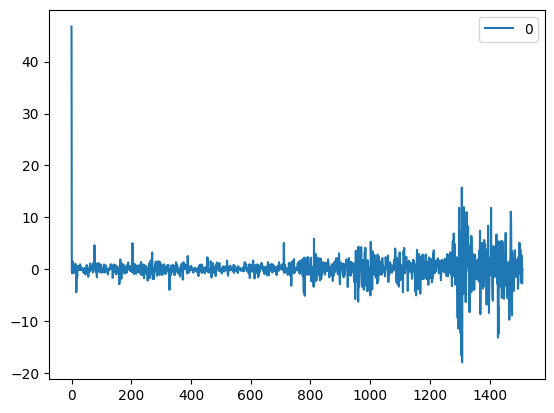

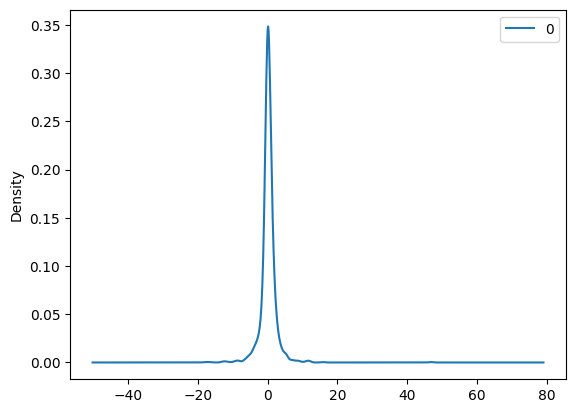

                 0
count  1511.000000
mean      0.179345
std       2.467331
min     -17.920404
25%      -0.428520
50%       0.099399
75%       0.846632
max      46.760000


In [35]:
#plot line and density of the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

### 7. Use the Arima model to forecast the next day

<Axes: >

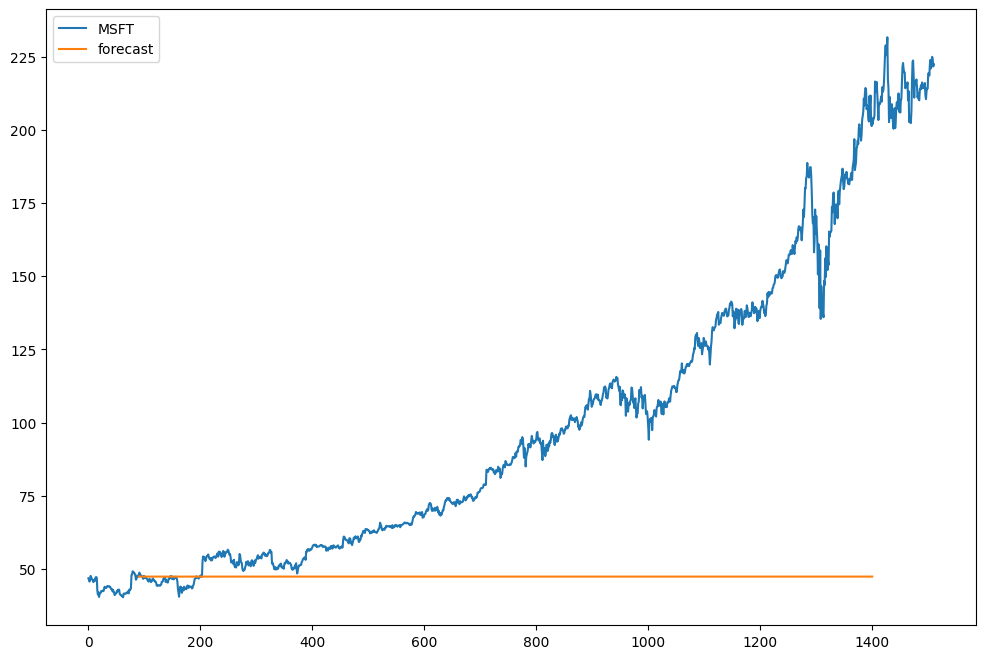

In [38]:
closing_price['forecast'] = model_fit.predict(start=90, end=1400, dynamic=True) # Forecast the data
closing_price[['MSFT', 'forecast']].plot(figsize=(12, 8)) # Plot the forecasted data

Reference: https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
https://blog.devgenius.io/finding-optimal-p-d-and-q-values-for-your-arima-model-94669a909a35

### 8. Autoarima - using Sktime
We compute ARIMA using another library

In [31]:
#----------------------------------- check the model -----------------------------------
### Fit using sktime
import sktime
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(stepwise=False, n_jobs=-1, start_p=0, start_q=0, max_p=10, max_q=10, seasonal=False)
forecaster.fit(closing_price["MSFT"])
forecaster.get_fitted_params()

{'intercept': 0.510688320519681,
 'ar.L1': -1.9738986944368295,
 'ar.L2': -1.249188898410207,
 'ar.L3': -0.17080198255862403,
 'ma.L1': 1.7383441318626813,
 'ma.L2': 0.8415843404120635,
 'sigma2': 4.451568950746324,
 'order': (3, 1, 2),
 'seasonal_order': (0, 0, 0, 0),
 'aic': 6554.478503072838,
 'aicc': 6554.553070316513,
 'bic': 6591.717557581501,
 'hqic': 6568.3467893311135}

In [40]:
closing_price['forecast2'] = forecaster.predict(start=90, end=1400, dynamic=True) # Forecast the data
closing_price[['MSFT', 'forecast2']].plot(figsize=(12, 8)) # Plot the forecasted data

NameError: name 'ForecastingHorizon' is not defined